In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import mnist

In [5]:
((x_train, y_train), (x_test, y_test)) = mnist.load_mnist()

In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [7]:
x_train[0]
print(x_train[0].max())
print(x_train[0].min())

1.0
0.0


7


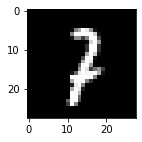

In [8]:
plt.figure(figsize=(5,2))
num = 884
print(y_train[num])
plt.imshow(x_train[num].reshape(28,28) , cmap = "gray")

In [9]:
x_train = x_train[:10000] 
y_train = y_train[:10000]
x_test = x_test[:5000]
y_test = y_test[:5000]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((10000, 784), (10000,), (5000, 784), (5000,))

In [10]:
np.bincount(y_train)

array([1001, 1127,  991, 1032,  980,  863, 1014, 1070,  944,  978],
      dtype=int64)

## Model

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression(solver = "lbfgs", multi_class = "auto")
model.fit(x_train,y_train)
print("훈련 점수 :", model.score(x_train,y_train))
print("테스트 점수 :", model.score(x_test,y_test))

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


훈련 점수 : 0.9676
테스트 점수 : 0.876


In [13]:
model.predict([x_test[1]])

array([2], dtype=uint8)

In [14]:
model.predict_proba([x_test[1]])  ###확률값

array([[1.04204588e-03, 8.84195820e-06, 9.27792597e-01, 1.14946846e-03,
        4.47230454e-14, 7.48764440e-04, 6.87102729e-02, 2.11272031e-13,
        5.48009350e-04, 5.20487023e-11]])

In [15]:
model.coef_.shape

(10, 784)

In [16]:
model.intercept_

array([-1.16442962, -0.17951241,  0.51253881, -0.63465926,  0.59983167,
        2.69882961, -0.74727403,  2.31065695, -2.84471805, -0.55126367])

In [17]:
from sklearn.svm import LinearSVC

In [18]:
model = LinearSVC()
model.fit(x_train,y_train)
print("훈련 점수 :", model.score(x_train,y_train))
print("테스트 점수 :", model.score(x_test,y_test))

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


훈련 점수 : 0.9679
테스트 점수 : 0.86


In [20]:
from sklearn.model_selection import cross_val_score

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
c_list = [0.0001,0.001,0.01,0.1,1,10,100]

In [25]:
for c in c_list :
    model = LogisticRegression(C = c, solver = "lbfgs", multi_class = "auto")
    result = cross_val_score(model, x_train, y_train, cv = 5)
    print("C : {} score : {}".format(c, result.mean()))

C : 0.0001 score : 0.7346049667174912
C : 0.001 score : 0.8595013090119998
C : 0.01 score : 0.8961982805037356
C : 0.1 score : 0.9116968115981472
C : 1 score : 0.9040994014031177
C : 10 score : 0.8856954688919133
C : 100 score : 0.8787991540039648


In [26]:
model = LogisticRegression(C=0.1, solver = "lbfgs", multi_class = "auto")
model.fit(x_train,y_train)
print("훈련 점수 :", model.score(x_train,y_train))
print("테스트 점수 :", model.score(x_test,y_test))

훈련 점수 : 0.9413
테스트 점수 : 0.8878


In [27]:
for c in c_list :
    model = LinearSVC(C = c)
    result = cross_val_score(model, x_train, y_train, cv = 5)
    print("C : {} score : {}".format(c, result.mean()))

C : 0.0001 score : 0.840903072220273
C : 0.001 score : 0.8887982679048967
C : 0.01 score : 0.9034972982980015
C : 0.1 score : 0.9023984969028002
C : 1 score : 0.8872047640269857
C : 10 score : 0.8663024243197525
C : 100 score : 0.8607988159065272
